In [66]:
import pandas as pd

data = pd.read_csv('Iris-dataset.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,NaN,setosa


In [67]:
y = data.pop('class')
y_new = y.copy()
y_new = y_new.replace(['setosa','versicolor','virginica'],[0,1,2])
print(y_new)


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64


In [68]:
data.isnull().sum()

sepal_length    4
sepal_width     1
petal_length    3
petal_width     4
dtype: int64

In [69]:
data.T.isnull().any().sum()

11

In [70]:
import numpy as np
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values= np.nan , strategy = 'median')
X = impute.fit_transform(data)


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y_new,stratify=y_new,test_size =0.25)

In [72]:
import matplotlib.pyplot as plt
print(type(X_train))
N , p = X_train.shape
classes = np.unique(Y_train)
print("The number of samples are {}, and the number of features are {}.".format(N,p))
print("The number of classes are {}".format(len(classes)))

<class 'numpy.ndarray'>
The number of samples are 112, and the number of features are 4.
The number of classes are 3


In [73]:
X_train = pd.DataFrame(data = X_train, columns=['sepal_length','sepal_width','petal_length','petal_width'])
X_train.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.5,1.6,0.6
1,6.9,3.1,4.9,1.5
2,5.8,2.7,4.1,1.0
3,7.2,3.6,6.1,2.5
4,5.6,3.0,4.1,1.3


In [74]:
data.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,146.00000,149.000000,147.000000,146.000000
mean,5.84726,3.059732,3.804762,1.197260
std,0.83213,0.429317,1.752155,0.756849
min,4.30000,2.000000,1.000000,0.100000
25%,5.10000,2.800000,1.600000,0.300000
50%,5.80000,3.000000,4.400000,1.300000
75%,6.40000,3.300000,5.100000,1.800000
max,7.90000,4.400000,6.900000,2.500000


In [77]:
sepal_area = X_train['sepal_length']*X_train['sepal_width']
petal_area = X_train['petal_length']*X_train['petal_width']
print(sepal_area.shape)

(112,)


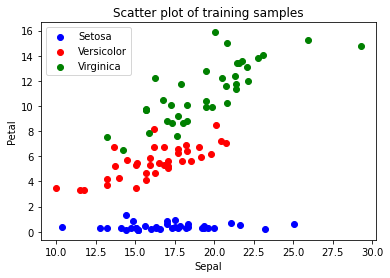

In [37]:
Y_train_0 = np.where(Y_train==0)
Y_train_1 = np.where(Y_train==1)
Y_train_2 = np.where(Y_train==2)

fig, ax =plt.subplots()
ax.scatter(sepal_area.loc[Y_train_0],petal_area.loc[Y_train_0],label='Setosa',color='blue')
ax.scatter(sepal_area.loc[Y_train_1],petal_area.loc[Y_train_1],label='Versicolor', color='red')
ax.scatter(sepal_area.loc[Y_train_2],petal_area.loc[Y_train_2],label='Virginica',color='green')
ax.set_xlabel('Sepal')
ax.set_ylabel('Petal')
ax.set_title('Scatter plot of training samples')
ax.legend()
plt.show()

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [39]:
knn_list= []
for k in range(1,11):
    knn_list.append(KNeighborsClassifier(n_neighbors=k,metric='euclidean'))
    knn_list[-1].fit(X_train,Y_train)
print(knn_list)

[KNeighborsClassifier(metric='euclidean', n_neighbors=1), KNeighborsClassifier(metric='euclidean', n_neighbors=2), KNeighborsClassifier(metric='euclidean', n_neighbors=3), KNeighborsClassifier(metric='euclidean', n_neighbors=4), KNeighborsClassifier(metric='euclidean'), KNeighborsClassifier(metric='euclidean', n_neighbors=6), KNeighborsClassifier(metric='euclidean', n_neighbors=7), KNeighborsClassifier(metric='euclidean', n_neighbors=8), KNeighborsClassifier(metric='euclidean', n_neighbors=9), KNeighborsClassifier(metric='euclidean', n_neighbors=10)]


In [40]:
training_acc = knn_model.score(X_train,Y_train)
test_acc = knn_model.score(X_test,Y_test)
print("Training accuracy of KNN_Classifier(k=3)= {:.4f}".format(training_acc))
print("Test accuracy of KNN_Classifier(k=3)= {:.4f}".format(test_acc))

Training accuracy of KNN_Classifier(k=3)= 0.9911
Test accuracy of KNN_Classifier(k=3)= 0.9211


/Users/saharsoltanmohammadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


/Users/saharsoltanmohammadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/saharsoltanmohammadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/saharsoltanmohammadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature name

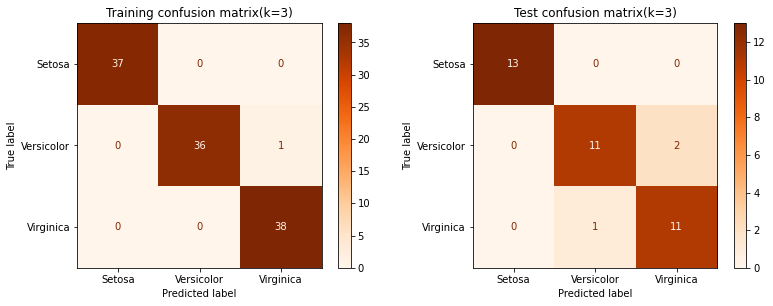

In [41]:
from sklearn.metrics import plot_confusion_matrix

fig,ax =plt.subplots(1,2,figsize=(13,4.5))
plot_confusion_matrix(knn_model,X_train,Y_train, cmap=plt.cm.Oranges, ax=ax[0],display_labels=['Setosa','Versicolor','Virginica'])
plot_confusion_matrix(knn_model, X_test, Y_test, cmap=plt.cm.Oranges, ax=ax[1],display_labels=['Setosa','Versicolor','Virginica'])
ax[0].set_title("Training confusion matrix(k=3)")
ax[1].set_title("Test confusion matrix(k=3)")

plt.show()

[92.10526315789474, 92.10526315789474, 92.10526315789474, 92.10526315789474, 92.10526315789474, 92.10526315789474, 92.10526315789474, 94.73684210526315, 94.73684210526315, 94.73684210526315]


/Users/saharsoltanmohammadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/saharsoltanmohammadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/saharsoltanmohammadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/saharsoltanmohammadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/saharsoltanmohammadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNe

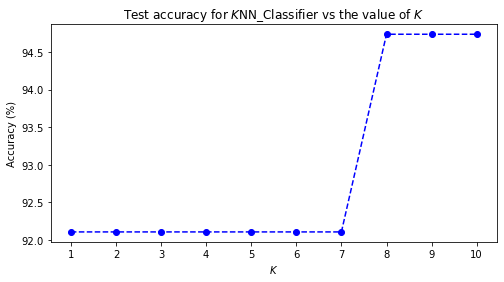

In [56]:
knn_scores = []
for k in range(1,11):
    knn_scores.append(knn_list[k-1].score(X_test,Y_test)*100)
print(knn_scores)

plt.figure(figsize=(8,4))
plt.plot(range(1,11),knn_scores,color='blue',linestyle='dashed',marker='o')
plt.xticks(range(1,11),range(1,11))
plt.title('Test accuracy for $K$NN_Classifier vs the value of $K$')
plt.xlabel('$K$')
plt.ylabel('Accuracy (%)')
plt.show()